<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#XGB" data-toc-modified-id="XGB-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>XGB</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчёт</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Проблема-и-задача-проекта" data-toc-modified-id="Проблема-и-задача-проекта-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Проблема и задача проекта</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Данные</a></span></li><li><span><a href="#Модели" data-toc-modified-id="Модели-6.0.3"><span class="toc-item-num">6.0.3&nbsp;&nbsp;</span>Модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.0.4"><span class="toc-item-num">6.0.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li></ul></div>

# Оптимизация работы промышленого предприятия 

# Цель проекта 
Предсказать температуру стали для снижения потребления электроэнергии на металлургическом комбинате

# План реализации

1) Проанализировать каждую из таблиц и с каждой поработать
        
        1.1 В таблицах bulk и wire необходимо заменить пропуски нулём т.к. они по-сути показывают что на данном этапе эта добавка не использовалась.
        1.2 В таблице temp необходимо удалить те ключи в которых есть только 1 наблюдение.

2) Понять какие столбцы из каких таблиц нам нужны и соединить всё в одну итоговую таблицу

        2.1 Необходимо объеденить все полученные столбцы с таблицей df_arc по ключу inner джойном.

3) Определиться с моделью и обучить её

        3.1 Попробуем использовать LinearRegression,CatBoost и LightGBM
4) Отчет

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import time
import lightgbm as ltb
import xgboost as xg


from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer
from sklearn.linear_model import LinearRegression
from datetime import date
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline,FeatureUnion

import warnings

warnings.filterwarnings('ignore')

In [3]:
try:
    
    arc = pd.read_csv('D://lstproject/final_steel/final_steel/data_arc.csv', parse_dates = ['Начало нагрева дугой','Конец нагрева дугой'])
    bulk = pd.read_csv('D://lstproject/final_steel/final_steel/data_bulk.csv')
    bulk_time = pd.read_csv('D://lstproject/final_steel/final_steel/data_bulk_time.csv')
    gas = pd.read_csv('D://lstproject/final_steel/final_steel/data_gas.csv')
    temp = pd.read_csv('D://lstproject/final_steel/final_steel/data_temp.csv',parse_dates = ['Время замера'])
    wire = pd.read_csv('D://lstproject/final_steel/final_steel/data_wire.csv')
    wire_time = pd.read_csv('D://lstproject/final_steel/final_steel/data_wire_time.csv')

except:
    
    arc = pd.read_csv('/datasets/final_steel/data_arc.csv', parse_dates = ['Начало нагрева дугой','Конец нагрева дугой'])
    bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    temp = pd.read_csv('/datasets/final_steel/data_temp.csv',parse_dates = ['Время замера'])
    wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')


## Анализ данных

Посмотрим на первый датасет

In [4]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [5]:
df_arc= arc.copy()

In [6]:
df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


Посчитаем сколько вообще итераций

In [7]:
df_arc['key'].value_counts()

2108    16
1513    15
1689    15
2567    14
46      13
        ..
112      1
2472     1
2025     1
3059     1
1615     1
Name: key, Length: 3214, dtype: int64

Так как максимально число встречающихся одинаковых 'key' это 16, значит максимальное и достаточное количество итераций 16(вряд ли предприятие не выпустило ни одной партии и 16 это не максимум), значит последней итерацией является 16-ая. Те партии, что встречаются один раз, видимо, были забракованы и далее на следующие итерации не дошли

Не очень понятно зачем нам время начала и время окончания нагрева дугой, ведь вместо них можно найти просто время работы дуги. Так же можно найти полную мощность из активной и реактивных мощностей, но это,возможно, плохая идея т.к температура может зависеть от одного вида мощности, а если они будут внутри одной переменной мы не узнаем какая из двух больше повлияла.

Найдём время работы дуги в днях

In [8]:
df_arc['Время работы дуги'] =(df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']) / np.timedelta64 ( 1 , 'D')
df_arc = df_arc.drop(columns=['Начало нагрева дугой','Конец нагрева дугой'])

In [9]:
df_arc

,key,Активная мощность,Реактивная мощность,Время работы дуги
0,1,0.976059,0.687084,0.002639
1,1,0.805607,0.520285,0.002141
2,1,0.744363,0.498805,0.001991
3,1,1.659363,1.062669,0.004225
4,1,0.692755,0.414397,0.001713
...,...,...,...,...
14871,3241,0.533670,0.354439,0.001817
14872,3241,0.676604,0.523631,0.002083
14873,3241,0.733899,0.475654,0.002130
14874,3241,0.220694,0.145768,0.000660


Найдём полную мощность

In [10]:
df_arc['Полная мощность'] = (df_arc['Активная мощность']**(2)+ df_arc['Реактивная мощность']**(2))**(0.5)

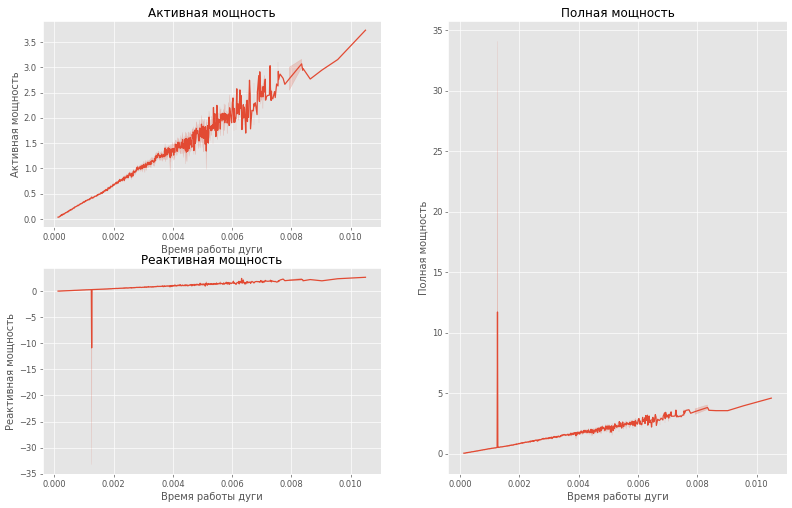

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(16, 10), dpi=60)
plt.style.use('ggplot')

pylab.subplot (2, 2, 1)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Активная мощность')
pylab.title("Активная мощность")

pylab.subplot (2, 2, 3)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Реактивная мощность')
pylab.title("Реактивная мощность")

pylab.subplot (1, 2, 2)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Полная мощность')
pylab.title("Полная мощность")

pylab.show()

Как видно, корреляция между активной мощностью и временем  работы дуги очень высокая, а вот реактивной-низкая, и как следствие, это снижает корреляцию между полной мощностью и временем работы дуги. Так же виден какой-то выброс в реактивной мощности, необходимо посмотреть что это и посмотреть что будет с графиками после его удаления.

In [12]:
df_arc.describe()

,key,Активная мощность,Реактивная мощность,Время работы дуги,Полная мощность
count,14876.000000,14876.000000,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592,0.001987,0.886809
std,934.571502,0.408159,5.878702,0.001136,5.881634
min,1.000000,0.030002,-715.504924,0.000127,0.036664
25%,806.000000,0.395297,0.290991,0.001238,0.495346
50%,1617.000000,0.555517,0.415962,0.001701,0.694961
75%,2429.000000,0.857034,0.637371,0.002477,1.066975
max,3241.000000,3.731596,2.676388,0.010498,715.505096


In [13]:
df_arc['Реактивная мощность'].sort_values(ascending= True)

9780    -715.504924
5596       0.020806
2419       0.021154
4914       0.022485
4633       0.022983
            ...    
13760      2.335088
12424      2.397032
9361       2.459959
9226       2.504206
7799       2.676388
Name: Реактивная мощность, Length: 14876, dtype: float64

Вот и он, благо что он всего один, его можно без проблем удалить.

In [14]:
df_arc = df_arc[df_arc['Реактивная мощность']> df_arc['Реактивная мощность'].min()]

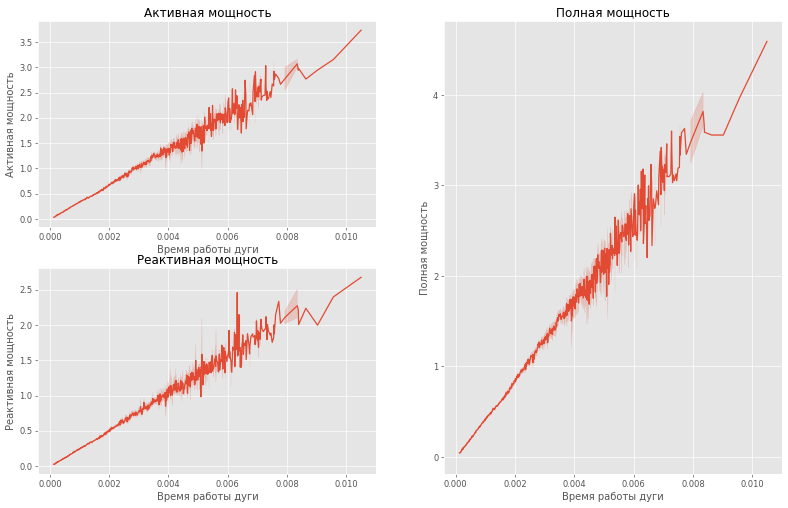

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(16, 10), dpi=60)
plt.style.use('ggplot')

pylab.subplot (2, 2, 1)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Активная мощность')
pylab.title("Активная мощность")

pylab.subplot (2, 2, 3)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Реактивная мощность')
pylab.title("Реактивная мощность")

pylab.subplot (1, 2, 2)
sns.lineplot(data=df_arc,x='Время работы дуги',y='Полная мощность')
pylab.title("Полная мощность")

pylab.show()

Ситуация сильно изменилась, теперь корреляция очевидна во всех случаях, это хорошо

array([[<AxesSubplot:title={'center':'Полная мощность'}>]], dtype=object)

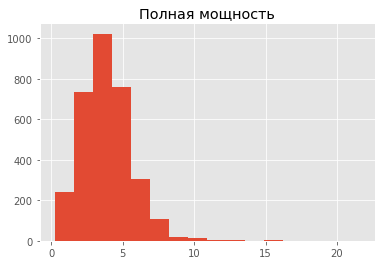

In [16]:
df_arc.groupby('key').agg({'Полная мощность':'sum'}).hist(bins=16)

In [17]:
grp_arc = df_arc.groupby('key').agg({'Полная мощность':['sum','mean'],'Время работы дуги':'mean'})

In [18]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Как видно, есть примерно 3к пропущенных значений. Неизвестно почему они были пропущены и пытаться их замечать средним/медианой/нулём будет необъективно, поэтому придётся их просто удалить

In [19]:
df_temp = temp.copy()
#df_temp = df_temp.dropna()

In [20]:
grp_temp = df_temp.groupby('key').agg({'Температура':['first','last','count']})

In [21]:
grp_temp

Температура              
           first    last count
key                           
1         1571.0  1613.0     5
2         1581.0  1602.0     6
3         1596.0  1599.0     5
4         1601.0  1625.0     3
5         1576.0  1602.0     2
...          ...     ...   ...
3237      1569.0  1569.0     1
3238      1584.0  1584.0     1
3239      1598.0  1598.0     1
3240      1617.0  1617.0     1
3241      1586.0  1586.0     1

[3216 rows x 3 columns]

In [22]:
grp_temp.columns = [ 'first','last','count']

In [23]:
x = grp_temp[grp_temp['count']==1].index
x = list(x) 

In [24]:
grp_temp = grp_temp.query(f'key not in {x}')

Теперь проанализируем зависимость температуры от времени замера

<AxesSubplot:xlabel='Время замера', ylabel='Температура'>

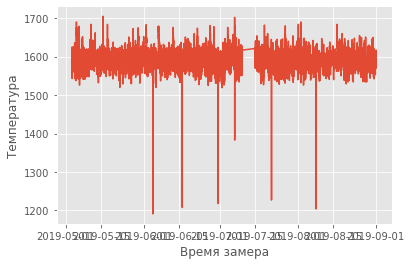

In [25]:
sns.lineplot(data=df_temp,x='Время замера',y='Температура')

На таком графике очевидных зависимостей не видно. Так как это временной ряд, воспользуемся функциями для анализа тренда и сезонности временных рядов

Создадим отдельный датафрейм только для анализа.

In [26]:
df_temp_analis = df_temp.copy()
df_temp_analis = df_temp_analis.set_index(['Время замера'])
df_temp_analis = df_temp_analis.drop(columns=['key'])

Ресемплируем по часу

In [27]:
df1 = df_temp_analis.resample('1H').sum()

Строить  тренд,сезонность и остаток декомпозиции

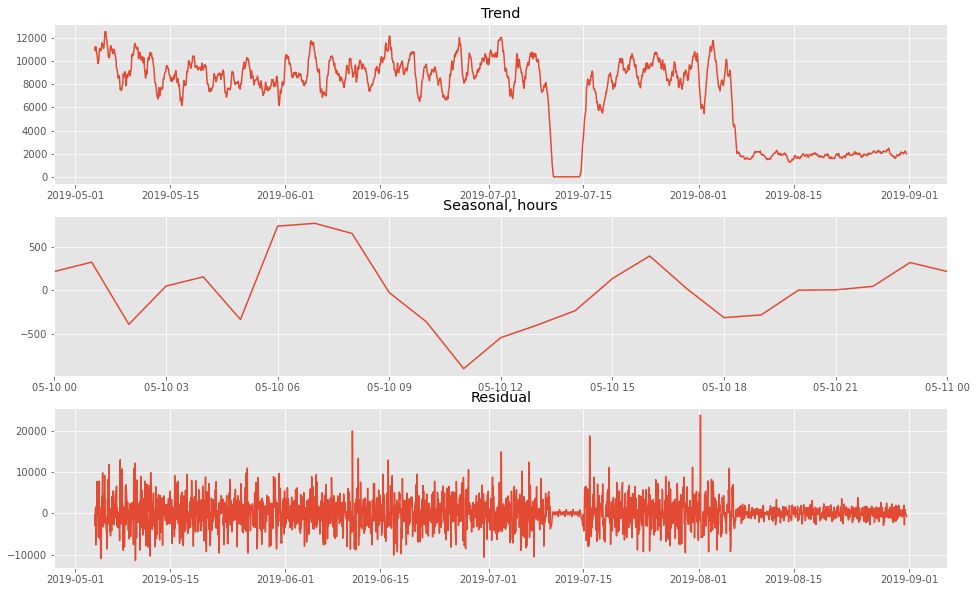

In [28]:
decomposed = seasonal_decompose(df1)


fig, axs = plt.subplots(3, figsize=(16,10), sharex=False)
axs[0].plot(decomposed.trend)
axs[0].set_title("Trend")

axs[1].plot(decomposed.seasonal)
axs[1].set_title("Seasonal, hours")
axs[1].axis(xmin=['2019-05-10'],xmax=['2019-05-11'])

axs[2].plot(decomposed.resid)
axs[2].set_title("Residual")

plt.show()

Никакого тренда не замечено, сезонность в течение дня так же отсутствует. Посмотрим на сезонность в течение месяца

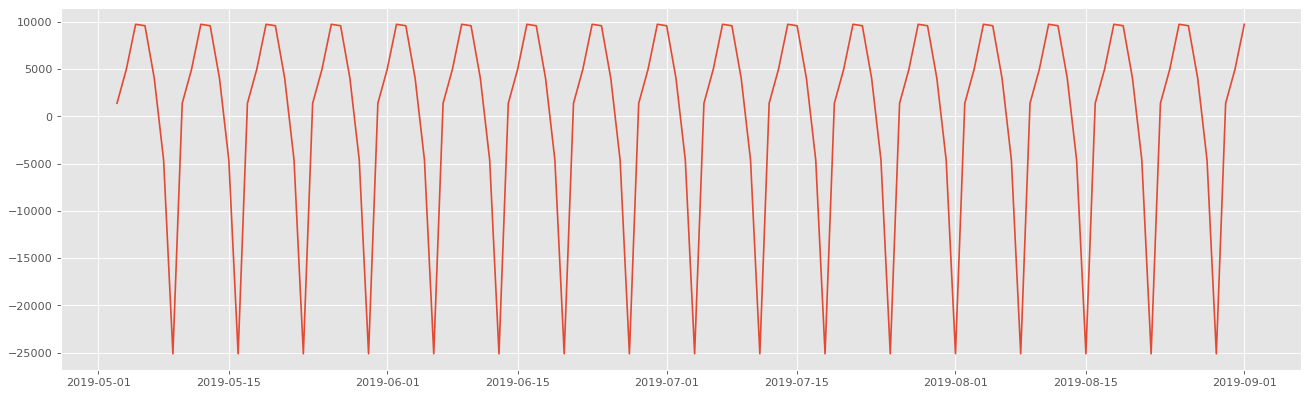

In [29]:
df2 = df_temp_analis.resample('1D').sum()
decomposed = seasonal_decompose(df2)
figure(figsize=(20, 6), dpi=80)
plt.plot(decomposed.seasonal)

Сезонность внутри месяца есть. Каждые 7 дней температура падает, что логично, ведь наступают выходные дни

<AxesSubplot:>

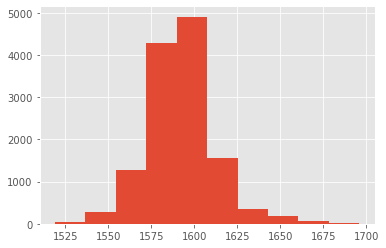

In [30]:
df_temp[(df_temp['Температура']>1500) & (df_temp['Температура']<1700)]['Температура'].hist()

Как видно, температура нормально распределена вокруг значения 1500

Теперь посмотрим на таблицу gas

In [31]:
gas.info()
df_gas = gas.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [32]:
gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Эта таблица маленькая и ,честно говоря, непонятно что показывает переменная "Газ 1". Объём газа израсходованный на одну партию, или его массу или ещё что-то, непонятно.

Далее посмотрим на таблицу bulk

In [33]:
bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Очевидно, что таблица будет выглядеть таким образом, ведь нет необходимости добавлять все сыпучие материалы разом, поэтому те, которые не были добавлены помечены как NaN, то есть по-сути 0.

In [34]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


<AxesSubplot:ylabel='count'>

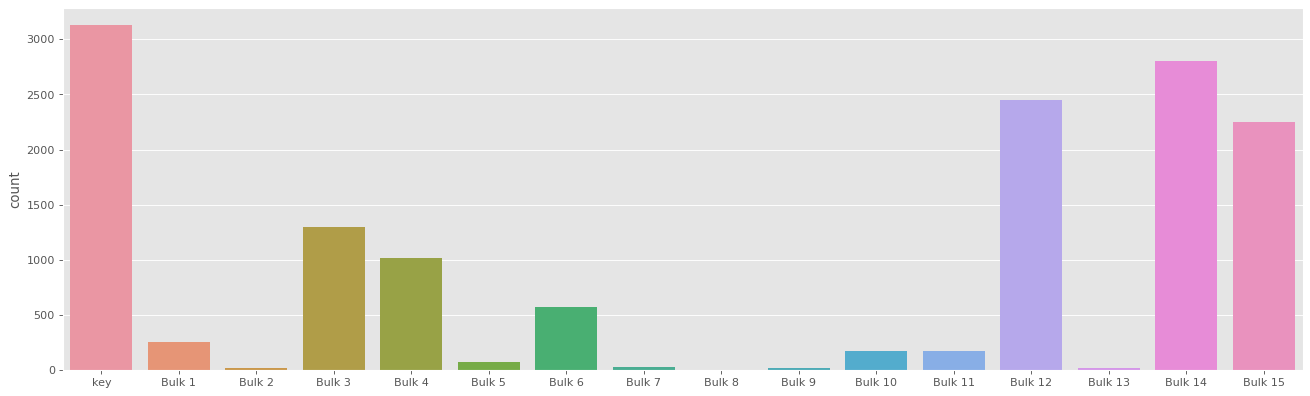

In [35]:
figure(figsize=(20, 6), dpi=80)
sns.countplot(data=bulk)

Как видно, некоторые сыпучие материалы используют совсем редко, их можно удалить

In [36]:
bulk_df = bulk.copy()
bulk_df = bulk_df.drop(columns=['Bulk 8'])

In [37]:
bulk_df = bulk_df.fillna(0)

Тоже самое проделываем с bulk_time

In [38]:
bulk_df_time= bulk_time.copy()
bulk_df_time = bulk_df_time.drop(columns=['Bulk 1','Bulk 2','Bulk 5','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11','Bulk 13'])
bulk_df_time = bulk_df_time.fillna('Unknown')
bulk_df_time.rename(columns = {'Bulk 3':'Bulk_time 3', 'Bulk 4':'Bulk_time 4',
                               'Bulk 6':'Bulk_time 6','Bulk 12':'Bulk_time 12',
                               'Bulk 14':'Bulk_time 14','Bulk 15':'Bulk_time 15'}, inplace = True )


Непонятно что делать дальше, т.к. Unknown,очевидно, типа Object, а Unknown есть в каждом столбце. При переводе в datetime будут или возникать ошибки, или Unknown будет заменяться на NaT, что по сути тоже самое что и NaN, и некоторые модели будут необучаемы. И вцелом непонятно зачем нам нужно время подачи сыпучих материалов. Что оно может нам дать?

Теперь посмотрим на таблицу wire

In [39]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


<AxesSubplot:ylabel='count'>

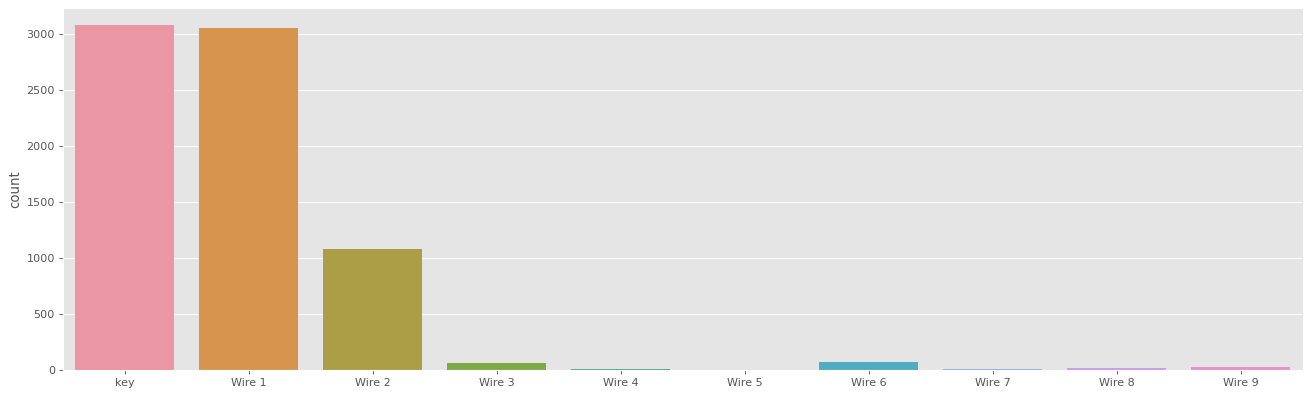

In [40]:
figure(figsize=(20, 6), dpi=80)
sns.countplot(data=wire)

Как видно, тоже много пропущенных значений, имеет смысл удалить столбцы в которых очень мало данных, а остальное заполнить нулями

In [41]:
wire_df = wire.copy()
wire_df = wire_df.drop(columns=['Wire 5'])
wire_df = wire_df.fillna(0)

Теперь соединим вместе нужные нам таблицы для обучения модели

In [42]:
df = grp_arc.merge(grp_temp,how = 'inner',on = 'key')
df = df.merge(df_gas,how = 'inner',on = 'key')
df = df.merge(bulk_df,how = 'inner',on = 'key')
df = df.merge(wire_df,how = 'inner', on = 'key')

In [43]:
df

,key,"(Полная мощность, sum)","(Полная мощность, mean)","(Время работы дуги, mean)",first,last,count,Газ 1,Bulk 1,Bulk 2,...,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
0,1,5.826395,1.165279,0.002542,1571.0,1613.0,5,29.749986,0.0,0.0,...,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.649216,0.912304,0.002347,1581.0,1602.0,6,12.555561,0.0,0.0,...,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.989534,0.597907,0.001516,1596.0,1599.0,5,28.554793,0.0,0.0,...,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.814962,0.953741,0.002144,1601.0,1625.0,3,18.841219,0.0,0.0,...,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4.035758,1.008939,0.002514,1576.0,1602.0,2,5.413692,0.0,0.0,...,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,3.986869,0.996717,0.002092,1570.0,1591.0,3,7.125735,0.0,0.0,...,129.0,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2325,2496,5.057033,0.842839,0.001813,1554.0,1591.0,4,9.412616,0.0,0.0,...,129.0,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2326,2497,2.885017,0.961672,0.002195,1571.0,1589.0,2,6.271699,0.0,0.0,...,124.0,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0
2327,2498,4.143749,0.828750,0.001736,1591.0,1594.0,5,14.953657,0.0,0.0,...,129.0,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


## Подготовка данных

Теперь посмотрим на колеряцию  признаков между собой

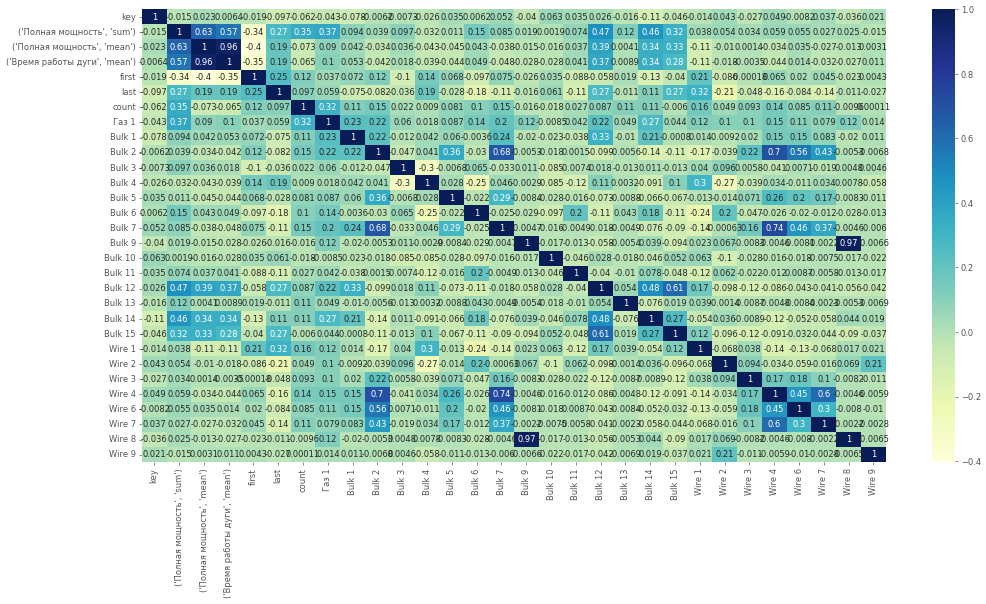

In [44]:
figure(figsize=(20, 10), dpi=60)
# plotting the correlation heatmap  
df_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
    
# displaying the heatmap  
plt.show()

In [45]:
df.info()
del df['key']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   key                        2329 non-null   int64  
 1   (Полная мощность, sum)     2329 non-null   float64
 2   (Полная мощность, mean)    2329 non-null   float64
 3   (Время работы дуги, mean)  2329 non-null   float64
 4   first                      2329 non-null   float64
 5   last                       2329 non-null   float64
 6   count                      2329 non-null   int64  
 7   Газ 1                      2329 non-null   float64
 8   Bulk 1                     2329 non-null   float64
 9   Bulk 2                     2329 non-null   float64
 10  Bulk 3                     2329 non-null   float64
 11  Bulk 4                     2329 non-null   float64
 12  Bulk 5                     2329 non-null   float64
 13  Bulk 6                     2329 non-null   float

Подготовим данные для обучения линейной регрессии

## Обучение моделей

### Linear Regression

Так как линейная регрессия чувствительна к мультиколинеарности признаков, для начала избавимся от неё

In [46]:
lin_df = df.copy()
del lin_df['Bulk 9']
del lin_df['Wire 4']

Выделим тренировочные и тестовые X и y

In [47]:
X_lin = lin_df.drop(['last'],axis = 1)
y_lin = lin_df['last']
X_train,X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.25, random_state=13122022)

Стандартизируем стандартскеллером все колонки т.к. они все числовые

In [48]:
numeric = df.columns

In [49]:
# к.р.
# Объявляем scaler и OneHotEncoder() для числовых и категориальных переменных соответственно
scaler = StandardScaler() 

lin_reg = LinearRegression()

# Делаем pipeline для числовых переменных датасета
numerical_selector = FunctionTransformer(lambda lin_df: lin_df, validate=False)
numerical_preprocessor = Pipeline([("numerical_selector", numerical_selector), ("scaling", scaler)])


# Объединяем созданные выше pipeline в один с помощью функции FeatureUnion и затем записываем итоговый pipeline на примере логистической регрессии
pipeline = Pipeline([("preprocessing", numerical_preprocessor), ("modelling", lin_reg)])

# Теперь можно обучить модель
pipeline.fit(X_train,y_train)
#pred = pipeline.predict(X_train)
pred = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error' )
mae = pred.mean()*(-1)
#mae = mean_absolute_error(y_train, pred)
print(f'MAE = {mae}')


#new_row = {'model': ' LinearRegression','RMSE': int(rms),'SMAPE':int(lin_smape)}
#models = models.append(new_row, ignore_index=True)


MAE = 6.863197432444503


MAE получилась меньше нужной, посмотрим на другие модели

### CatBoost

CatBoost не восприимчив к колинеарности признаков, поэтому её можно проигнорировать

In [50]:
X = df.drop(['last'],axis = 1)
y = df['last']
X_train_cat,X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.25, random_state=13122022)

Зададим метрику, которую будем минимизировать

In [51]:
mae = make_scorer(mean_absolute_error, greater_is_better=False)

Обучим CatBoost

In [53]:
grid_cat =  {"learning_rate":[0.01,0.05],
          "depth": [5,7,10],
         'l2_leaf_reg': [0,1,2]}
        
model = CatBoostRegressor(iterations = 1500,verbose=False, random_state = 13122022)

search = GridSearchCV(model, grid_cat, scoring=mae, cv=5,verbose=True)  

# execute search
ctbst = search.fit(X_train_cat, y_train_cat)
## summarize result
print('Best Score (MAE): %s' % ctbst.best_score_)
print('Best Hyperparameters: %s' % ctbst.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score (MAE): -5.932361265272638
Best Hyperparameters: {'depth': 7, 'l2_leaf_reg': 2, 'learning_rate': 0.01}


Предскажем метрику на тестовых данных.

In [55]:
pred = ctbst.predict(X_test_cat)
mean_absolute_error(y_test_cat,pred)

5.80877187795802

Получилась менее 6, то что нам нужно

### XGB

In [56]:
grid_xgb =  {"learning_rate":[0.01,0.05],
          "max_depth": [5,7,10],
          "lambda" : [0,1,2]}
        
model = xg.XGBRegressor(n_estimators = 1500 , random_state=131222)

search = GridSearchCV(model, grid_xgb, scoring=mae, cv=5,verbose=True)  

# execute search
xgb = search.fit(X_train_cat, y_train_cat)
## summarize result
print('Best Score (MAE): %s' % xgb.best_score_)
print('Best Hyperparameters: %s' % xgb.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score (MAE): -5.997257418956905
Best Hyperparameters: {'lambda': 1, 'learning_rate': 0.01, 'max_depth': 5}


### LGBM

In [57]:
X_train_lgb = X_train_cat.set_axis(list(range(0,28)), axis='columns', inplace=False)
X_test_lgb = X_test_cat.set_axis(list(range(0,28)), axis='columns', inplace=False)

In [58]:
grid_lgbm =  {"learning_rate":[0.01,0.05],
          "max_depth": [5,7,10],
         'reg_lambda': [0,1,2]}
        
model = ltb.LGBMRegressor(n_estimators  = 1500, verbosity = -1,random_state = 13122022)

search = GridSearchCV(model, grid_lgbm, scoring=mae, cv=5,verbose=True)  

# execute search
lgbm = search.fit(X_train_lgb, y_train_cat)
## summarize result
print('Best Score (MAE): %s' % lgbm.best_score_)
print('Best Hyperparameters: %s' % lgbm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score (MAE): -6.085476811910097
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'reg_lambda': 1}


## Тестирование

In [55]:
pred = ctbst.predict(X_test_cat)
mean_absolute_error(y_test_cat,pred)

5.80877187795802

## Общий вывод

CatBoost оказался самым точным и добил до нужной нам метрики. 

## Отчёт

                                Оптимизация производственных расходов металлургического предприятия

                                                            23.12.2022

                                                        Шелопугин Виталий

#### Проблема и задача проекта

С необходимостью оптимизации рабочего процесса так или иначе сталкивается каждое предприятие и задача в данном случае сделать эту оптимизацию наиболее осознанной, правильной и с минимальными потерями и последствиями. В этом и поможет машинное обучение. В моём проекте поставлена задача предсказать температуру стали на конечном этапе производства, тем самым не затрачивая электроэнергию на изначально убыточные партии. Необходимость этого очевидна, меньше расходуемой электроэнергии- меньше затрат на электроэнергию.

####  Данные

Нам дано несколько датасетов, посмотрим на каждый.

1)Данные об электродах. Этот датасет показывает сколько времени работала дуга нагрева и так же сколько было на это затрачено мощности. Очевидно, что этот датасет крайне важен для нас, ведь это один из самых энерго-затратных этапов обработки стали. 
Посмотрим на корреляцию между полной мощностью(вычисленной по формуле из активной и реактивной) и временем работы дуги
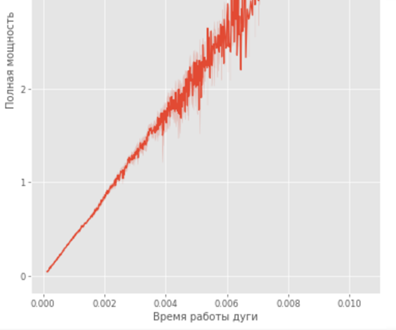
 
                Как видно корреляция есть и очень весомая. Далее посмотрим на распределение полной мощности
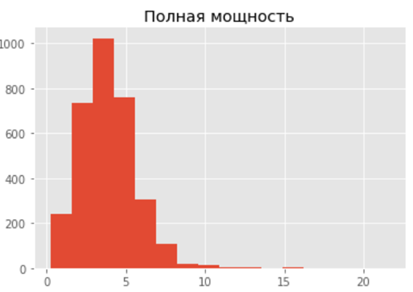

                Судя по графику распределения, полная мощность распределяется около 5.

2)Результаты измерения температуры. Этот датасет показывает чему была равна температура стали в конкретный момент времени, однако в вакууме нам это ничего не даёт. Однако, по этим данным можно найти, во-первых, сколько этапов прошла каждая из партий, во-вторых, какая была температура стали в момент когда партия первый раз фигурирует в датасете и в последний раз.
Ресемплируем по часу, и посмотрим есть ли тренд и сезонность в этих данных
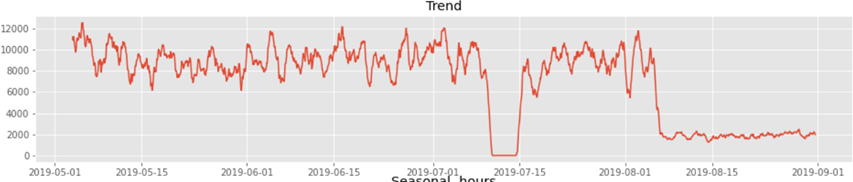
 
                    Как можно заметить, тренда в данных нет, посмотрим на сезонность
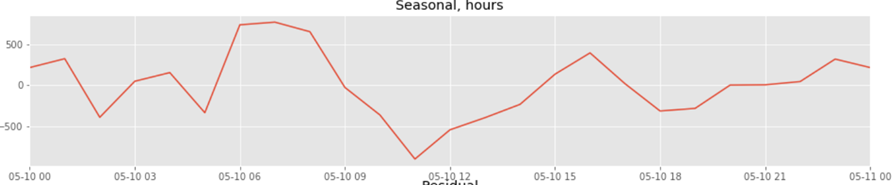
 
                        Сезонности тоже наблюдается.

3)	Газ. Таблица показывает какой объём газа был потрачен на одну партию.
4)	Масса. Таблица, показывающая какую массу конкретных сыпучих веществ потратили на конкретную партию
 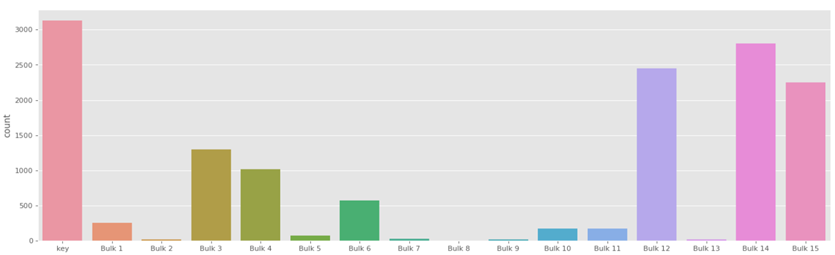
                        Как видно, некоторые добавки добавляли совсем редко, их можно удалить.

5)	Тоже самое с таблицей wire, которая показывает сколько было добавлено проволочных материалов (объём).

Оставшиеся таблицы bulk_time и wire_time показывают в какое время была добавлена та или иная добавка. Эти таблицы не дадут нам никакой информации, поэтому на них можно не обращать внимания. 

После анализа всех данных, работы с пропусками и выделения нужных переменных соединим все таблицы в одну. Теперь на этой таблице можно обучать модели

#### Модели

Для предсказания конкретного значения есть несколько вариантов моделей,которые могут нам помочь

1)	Линейная регрессия. Линейная регрессия быстрообучаемая, мало гиперпараметров и на наших данных даёт неплохие результаты «из коробки».

Однако, линейная регрессия требовательна к мультиколлинеарности признаков, поэтому сначала нужно удалить признаки, которые коррелируют между собой. Далее стандартизируем переменные и обучаем модель. Итоговая метрика MAE на тренировочных данных составляет 6.86, что уже неплохой результат, но хотелось бы больше, поэтому попробуем другие модели.

2)	Градиентный бустинг. А именно CatBoost,XGBoost,LightGBM.
Бустинги не восприимчивы к разности размеров данных, поэтому нет необходимости их стандартизировать. Так же нет необходимости удалять коллинеарные признаки, поэтому так же обучаем все 3 бустинга на кросс-валидации с перебором 3ёх гиперпараметров:
Learning_rate, depth, l2_regularisation.
На всех трёх бустингах получаем результат лучше чем на линейной модели. Лучше всех себя показал Catboost с итоговым результатом MAE на тренировочной выборке в 5.93. Проверяем на тестовых данных, получаем MAE 5.8

#### Выводы

По итогу выполненного проекта можно сделать вывод что задача оптимизации расхода электроэнергии на предприятии была выполнена вполне неплохо, лучшая модель в среднем ошибается на 5.8 градусов, что в разрезе средней температуры в 1500 небольшая погрешность, а именно 0.39%. Градиентный бустинг очень хорошо подходит для этой задачи, как и для большинства табличных данных, однако если совсем нет времени и ресурсов на подбор гиперпараметров и обучение бустинга, можно использовать линейную регрессию, она показала себя неплохо.
